In [1]:
import keras
import numpy
import matplotlib.pyplot as plotter
import PIL
import json
import time
import tensorflow

In [2]:
model = keras.Sequential()

# Rebuild the vgg16 layers without the max pooling

model.add(keras.layers.Input((224, 224, 3)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(keras.layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    
# Final layer to get the density map
model.add(keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.Conv2D(1, (3, 3),  padding="same", activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 256)     295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 512)     1180160   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 512)     2359808   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 128)     589952    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 1)       1

In [3]:
# Load the pretrained weights (Trained with 2k images)
model.load_weights("Latest_Weights (2k images).h5")

In [4]:
def load_image(prediction_images, index, filename):
    image_load = PIL.Image.open(filename)        
    width, height = image_load.size

    # Resize the image
    prediction_images[index] = numpy.asarray(image_load.resize((224, 224)))[:,:,0:3]

In [5]:
prediction_images = numpy.full((5000, 224, 224, 3), 0)

start_time = time.time()

for i in range(5000):
    name_str = str(i + 1).zfill(4)
    load_image(prediction_images, i, "Images/" + name_str + ".jpg")
    
    if i % 200 == 0:
        print(i, " images loaded so far!")

print("Time taken: ", time.time() - start_time)

0  images loaded so far!
200  images loaded so far!
400  images loaded so far!


C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


600  images loaded so far!
800  images loaded so far!
1000  images loaded so far!
1200  images loaded so far!
1400  images loaded so far!
1600  images loaded so far!
1800  images loaded so far!
2000  images loaded so far!
2200  images loaded so far!
2400  images loaded so far!
2600  images loaded so far!
2800  images loaded so far!
3000  images loaded so far!
3200  images loaded so far!
3400  images loaded so far!
3600  images loaded so far!
3800  images loaded so far!
4000  images loaded so far!
4200  images loaded so far!
4400  images loaded so far!
4600  images loaded so far!
4800  images loaded so far!
Time taken:  1016.8252165317535


In [6]:
start_time = time.time()

prediction = model.predict(prediction_images, verbose=1, batch_size=100)
    
print("Prediction Time taken: ", time.time() - start_time)

50/50 [==============================] - 24675s 494s/step
Prediction Time taken:  25167.13289451599


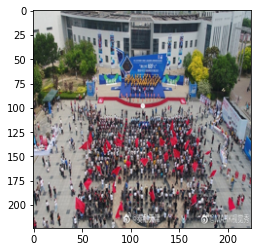

In [7]:
plotter.imshow(prediction_images[3733])

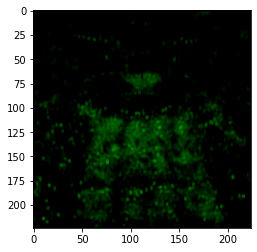

In [8]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[3733][:,:,0]

plotter.imshow(predicted_density)

In [9]:
# Save the prediction as textfiles
for i in range(5000):
    name_str = str(i + 1).zfill(4)
    numpy.savetxt("Density_2K/" + name_str + ".txt", prediction[i][:,:,0])